# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.001
0.0
0.0
0.0
0.0
0.0
0.002
-0.003
-0.004
-0.004
-0.004
-0.002
-0.003
-0.004
-0.004
0.976
0.981
0.98
0.979
0.978
1.954
1.957
1.957
1.956
1.957
2.932
2.936
2.935
2.934
2.933
3.912
3.916
3.916
3.916
3.916
4.892
4.895
4.895
4.894
4.896
4.896
5.872
5.872
5.871
5.872
6.64
6.642
6.643
6.643
6.643
7.401
7.403
7.404
7.404
7.404
7.404
8.403
8.403
8.403
8.403
9.4
9.4
9.398
9.398
10.394
10.397
10.398
10.397
10.397
11.393
11.396
11.396
11.396
11.396
12.391
12.395
12.395
12.395
12.395
12.395
13.394
13.394
13.392
13.393
13.994
13.999
13.999
13.997
13.997
14.599
14.602
14.602
14.601
14.602
15.597
15.601
15.601
15.599
15.6
16.594
16.598
16.598
16.597
16.598
17.594
17.596
17.597
17.595
17.598
18.592
18.596
18.596
18.596
18.597
19.592
19.595
19.595
19.594
19.596
20.592
20.596
20.595
20.595
21.188
21.19
21.191
21.191
21.787
21.787
21.786
21.786
22.785
22.785
22.783
22.783
23.766
23.766
23.763
23.764
24.765
24.764
24.763
24.76

57.576
57.576
57.575
57.575
57.575
57.575
57.575
57.574
57.574
57.574
57.574
57.573
57.573
57.573
57.573
57.573
57.572
57.572
57.572
57.572
57.572
57.573
57.573
57.573
57.573
57.573
57.573
57.572
57.572
57.571
57.571
57.571
57.723
57.723
57.723
57.723
57.723
57.723
57.723
57.723
57.742
57.742
57.74
57.739
57.739
57.739
57.739
57.738
57.738
57.738
57.738
57.738
57.738
57.733
57.733
57.733
57.735
57.735
57.735
57.735
57.736
57.728
57.731
57.731
57.733
57.734
57.735
57.735
57.735
57.735
57.735
57.735
57.736
57.735
57.735
57.834
57.839
57.839
57.84
57.841
57.841
57.841
57.841
57.841
57.84
57.84
57.842
57.842
57.841
57.841
57.841
57.841
57.841
57.84
57.84
57.84
57.84
57.84
57.839
57.839
57.839
57.839
57.839
57.839
57.838
57.838
57.837
57.837
57.836
57.836
57.836
57.836
57.836
57.836
57.836
57.837
57.838
57.838
57.838
57.836
57.836
57.836
57.836
57.835
57.835
58.029
58.028
58.028
58.028
58.028
58.028
58.019
58.019
58.047
58.047
58.047
58.047
58.06
58.06
58.06
58.063
58.061
58.061
58.06
58.06

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1467,2934,59.992
1468,2936,59.992
1469,2938,59.992
1470,2940,59.992


<IPython.core.display.Javascript object>


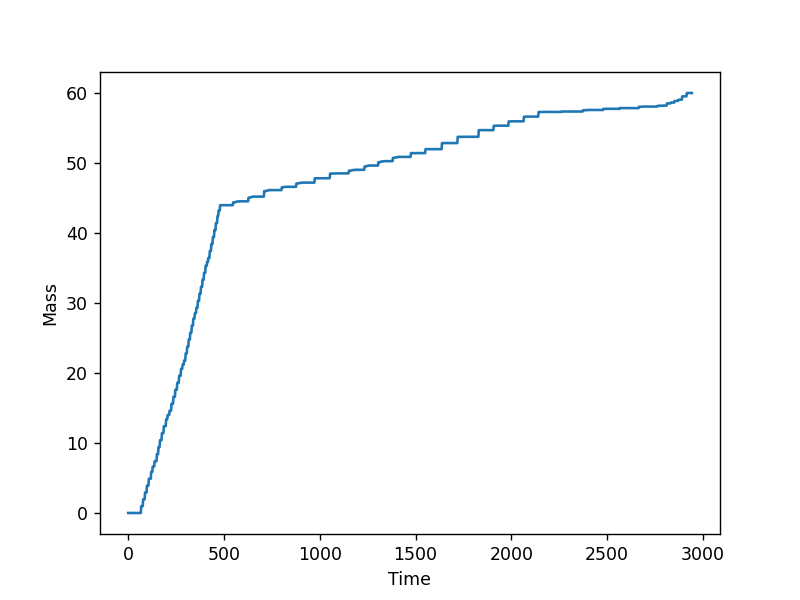

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_110723_S637-642.csv')